In [1]:
!pip install -q geopandas

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 14.7MB 240kB/s 
     |████████████████████████████████| 10.9MB 40.5MB/s 


In [2]:
!git clone https://github.com/tsycstang/china_geojson

Cloning into 'china_geojson'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 48 (delta 5), reused 48 (delta 5), pack-reused 0
Unpacking objects: 100% (48/48), done.


In [0]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
china_prov = gpd.read_file('/content/china_geojson/China_provincial.geojson').astype({'code': str})

In [0]:
region_dict = {'1': 'HuaBei',
               '2': 'DongBei',
               '3': 'HuaDong',
               '4': 'ZhongNan',
               '5': 'XiNan',
               '6': 'XiBei',
               '7': 'TaiWan',
               '8': 'GangAo'}
region_list = []

for i in range(len(china_prov)):
    code = china_prov.loc[i, 'code']
    region_list.append(region_dict[code[0]])

china_prov['region'] = region_list
china_prov = china_prov.astype({'region': 'category'})

In [4]:
china_prov.head()

,code,name,geometry,region
0,440000,广东省,"MULTIPOLYGON (((117.28794 23.25320, 117.28685 ...",ZhongNan
1,410000,河南省,"MULTIPOLYGON (((111.02097 33.47121, 111.02065 ...",ZhongNan
2,230000,黑龙江省,"MULTIPOLYGON (((124.14303 50.56614, 124.15190 ...",DongBei
3,650000,新疆维吾尔自治区,"POLYGON ((86.74150 48.92107, 86.74087 48.92180...",XiBei
4,420000,湖北省,"MULTIPOLYGON (((111.04675 33.20293, 111.05143 ...",ZhongNan


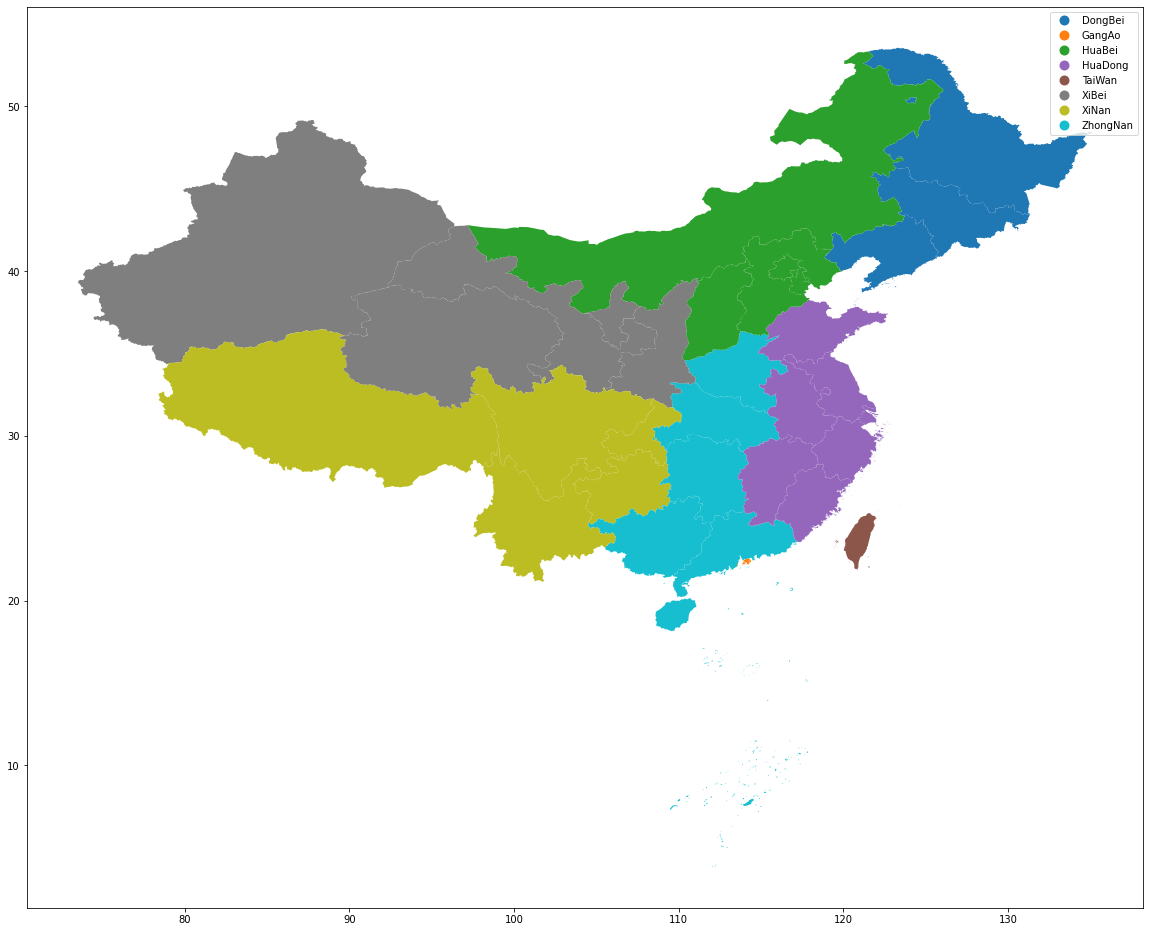

In [5]:
china_prov.plot('region', figsize=(20, 20), legend=True)

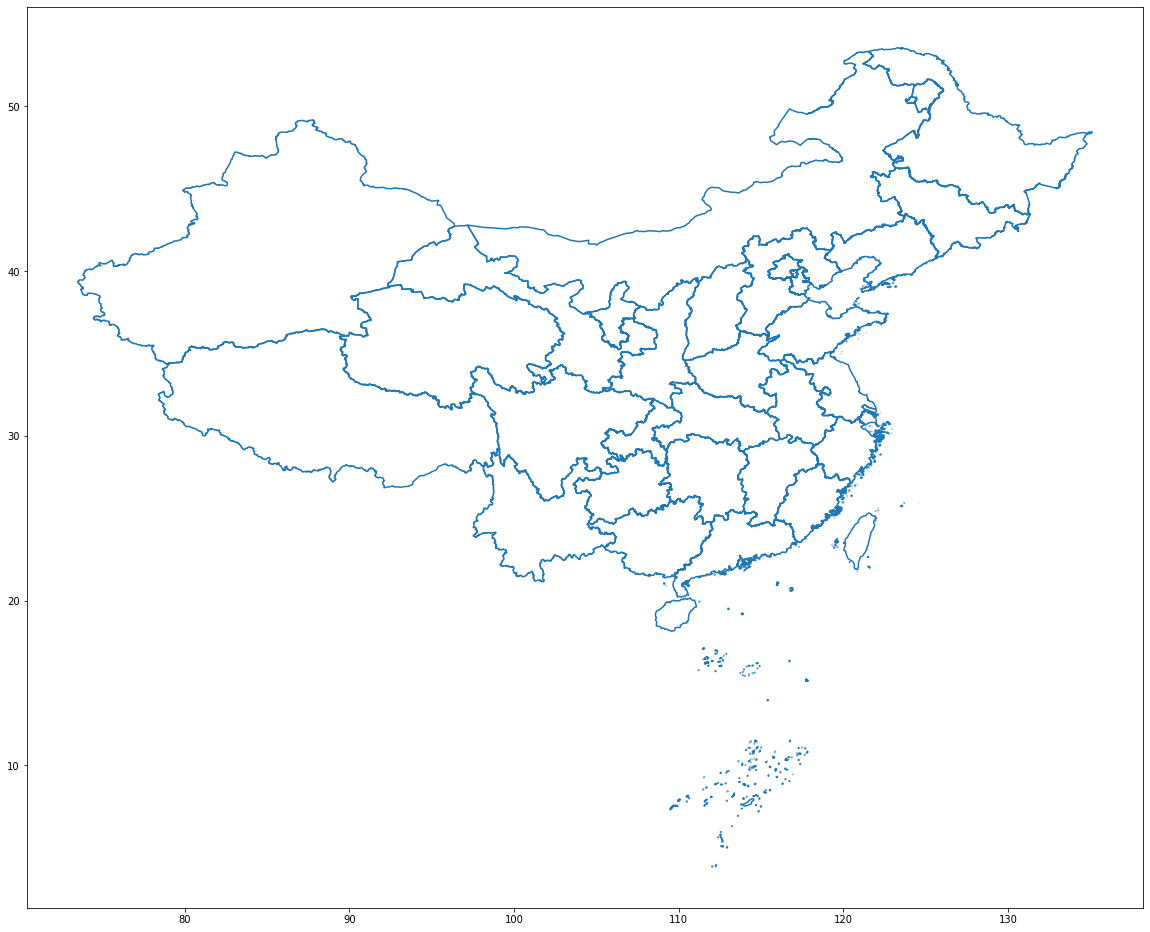

In [6]:
china_prov.boundary.plot(figsize=(20, 20))

In [0]:
province_rule = ['Anhui', 'Beijing_overall', 'Chongqing_overall', 'Fujian',
                 'Gansu', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan','Hebei', 
                 'Heilongjiang', 'Henan', 'HongKongSAR', 'Hubei', 'Hunan', 
                 'InnerMongol', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning', 
                 'MacauSAR', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 
                 'Shanghai_overall', 'Shanxi', 'Sichuan', 'Tianjin_overall', 
                 'Tibet', 'Xinjiang', 'Yunnan', 'Zhejiang']

china_plot = gpd.read_file('/content/china_geojson/Provinces/Taiwan.geojson')
for province in province_rule:
    json_path = '/content/china_geojson/Provinces/' + province + '.geojson'
    china_plot = pd.concat([china_plot, gpd.read_file(json_path)]).reset_index(drop=True)

In [8]:
china_plot.head()

,code,name,geometry
0,710000,台湾省,"MULTIPOLYGON (((119.55430 23.68248, 119.55499 ..."
1,340600,淮北市,"MULTIPOLYGON (((117.03154 34.16670, 117.03168 ..."
2,341200,阜阳市,"MULTIPOLYGON (((114.89730 33.08659, 114.89694 ..."
3,340700,铜陵市,"MULTIPOLYGON (((116.96071 30.62856, 116.95715 ..."
4,341000,黄山市,"POLYGON ((118.86886 30.10146, 118.87197 30.096..."


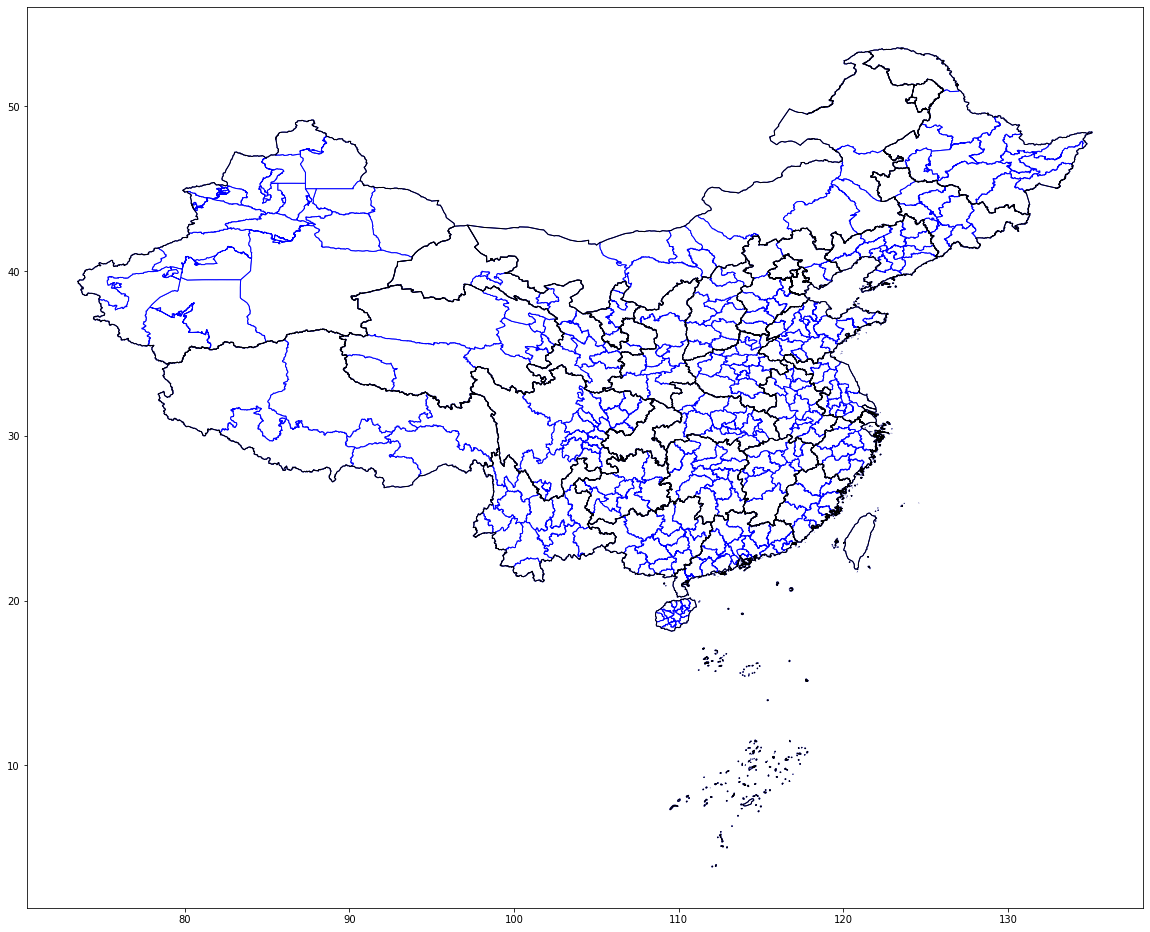

In [9]:
base = china_plot.plot(facecolor='white', edgecolor='blue', figsize=(20, 20))
china_prov.plot(ax=base, facecolor='none', edgecolor='black')

In [0]:
china_data = pd.read_csv('/content/china_hdi_data.csv')

In [0]:
china_data = china_data.astype({'code': str})

In [0]:
china_plot = china_plot.merge(china_data, on='code')

In [13]:
china_plot

,code,name,geometry,province name,prefecture name,hdi
0,340600,淮北市,"MULTIPOLYGON (((117.03154 34.16670, 117.03168 ...",安徽省,淮北市,0.738
1,341200,阜阳市,"MULTIPOLYGON (((114.89730 33.08659, 114.89694 ...",安徽省,阜阳市,0.675
2,340700,铜陵市,"MULTIPOLYGON (((116.96071 30.62856, 116.95715 ...",安徽省,铜陵市,0.752
3,341000,黄山市,"POLYGON ((118.86886 30.10146, 118.87197 30.096...",安徽省,黄山市,0.735
4,340800,安庆市,"MULTIPOLYGON (((116.90333 30.35727, 116.91034 ...",安徽省,安庆市,0.722
...,...,...,...,...,...,...
332,330500,湖州市,"POLYGON ((119.92001 31.17092, 119.92049 31.170...",浙江省,湖州市,0.782
333,330700,金华市,"POLYGON ((119.32242 28.80091, 119.32239 28.801...",浙江省,金华市,0.771
334,330800,衢州市,"POLYGON ((119.32251 28.80507, 119.32259 28.803...",浙江省,衢州市,0.761
335,330100,杭州市,"POLYGON ((118.34497 29.47570, 118.34619 29.474...",浙江省,杭州市,0.808


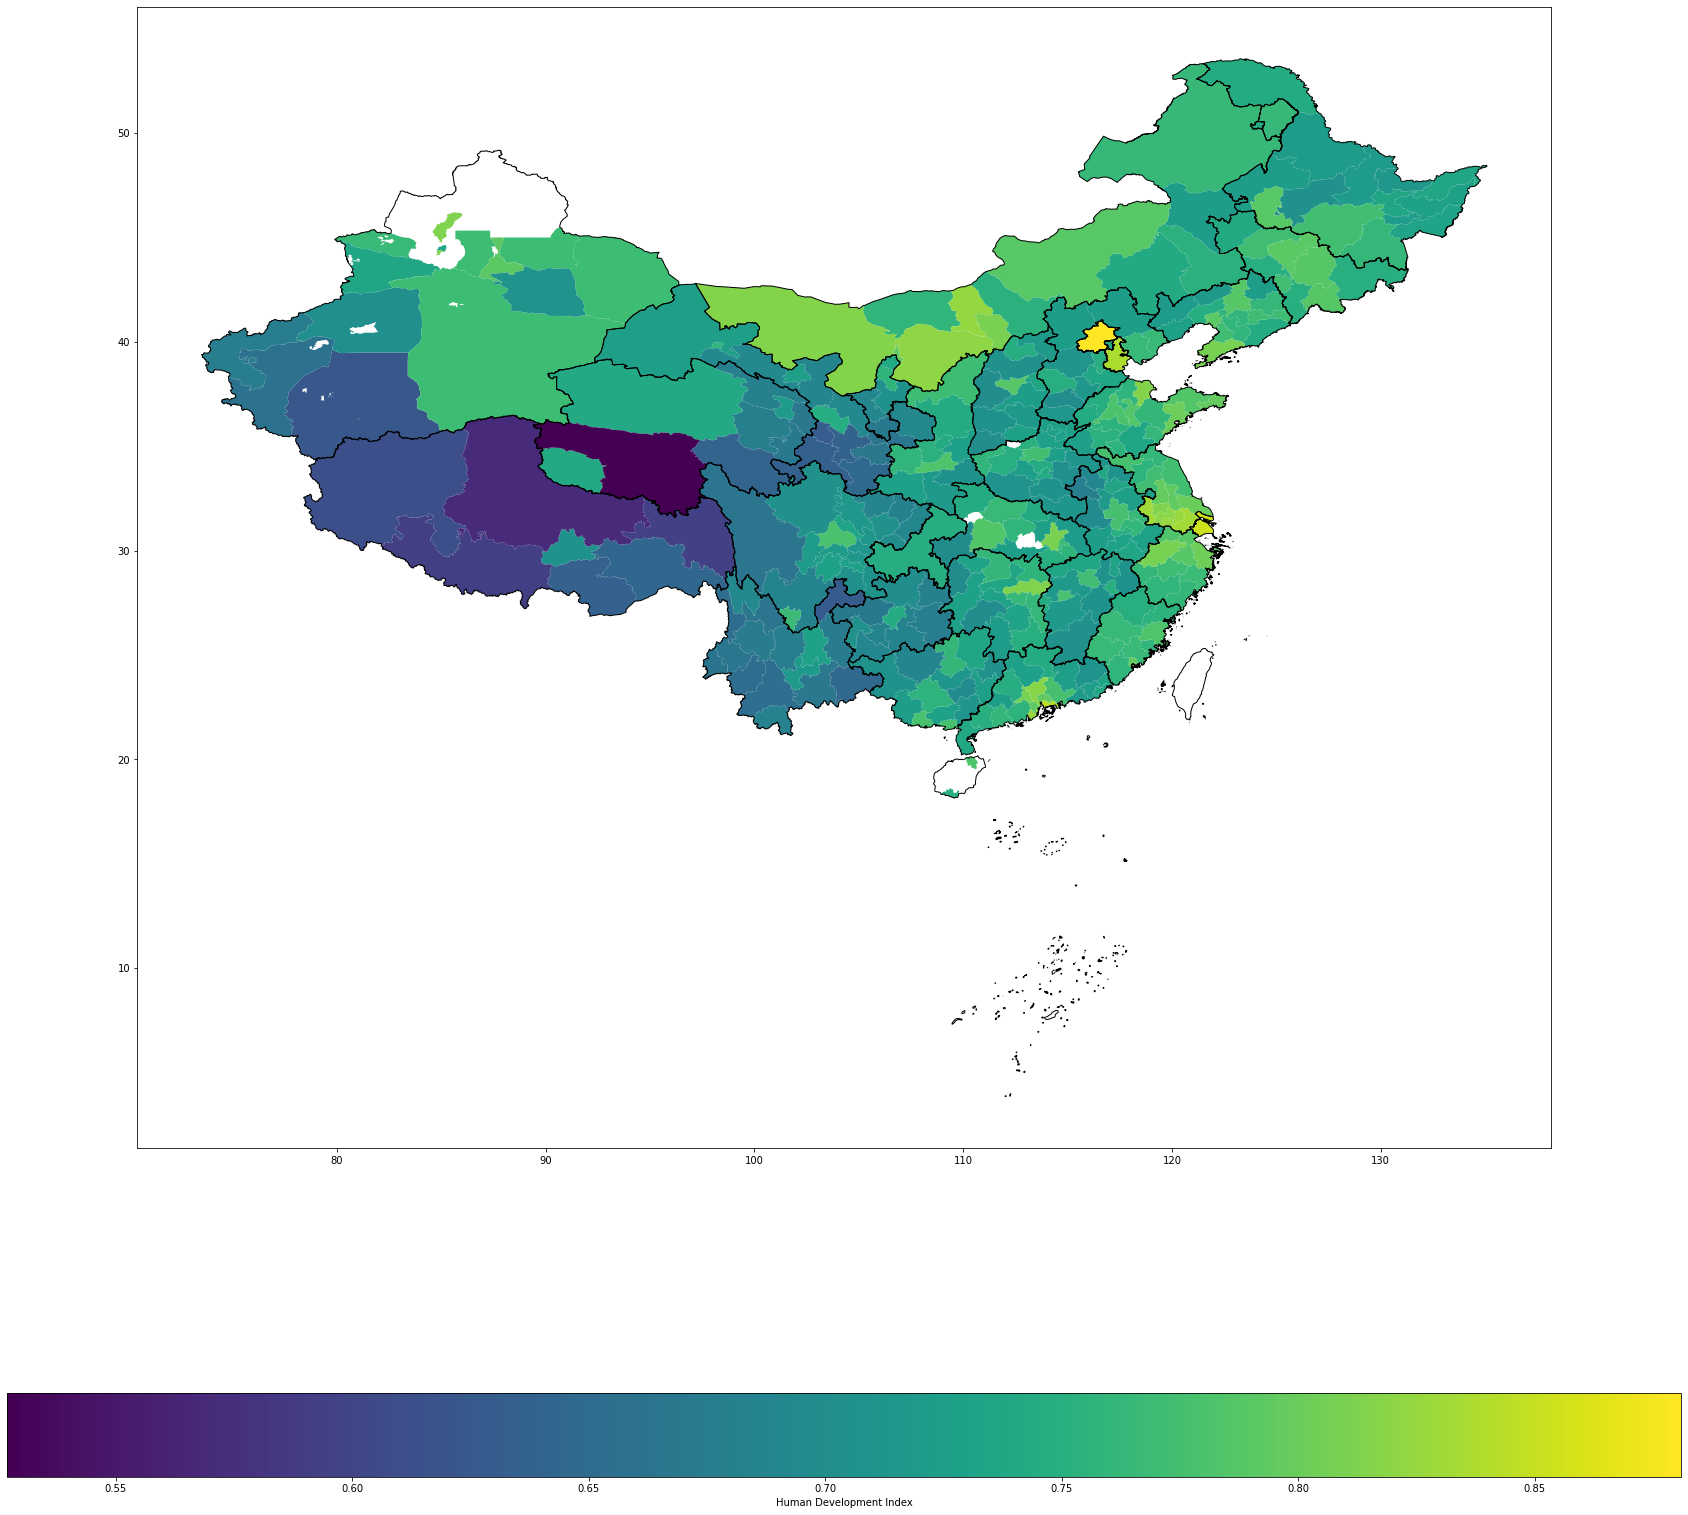

In [14]:
based = china_plot.plot('hdi', figsize=(30, 30), legend=True, 
                        legend_kwds={'label': "Human Development Index", 
                                     'orientation': "horizontal"},
                        )
china_prov.plot(ax=based, facecolor='none', edgecolor='black')